In [1]:
import numpy as np
import pandas as pd
import scipy as sp
import sklearn as sl
from sklearn.linear_model import LinearRegression
import seaborn as sns; sns.set()
import matplotlib as mpl
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import axes3d
from matplotlib import cm
%matplotlib inline

# Tarea 3: Encuentre la regresión

Ud recibe unos datos $x$ y $y$ cómo se muestran a continuación. Ud debe responder cuatro preguntas a partir de estos datos. Suponga que ud tiene un modelo tal que $y=f(x)$ más aún desconoce $f$.

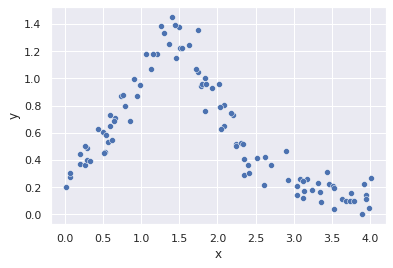

,x,y
0,0.065859,0.277413
1,0.020931,0.202239
2,0.070312,0.307369
3,0.206166,0.367530
4,0.286572,0.491144
...,...,...
95,3.922613,0.225565
96,3.898473,0.000000
97,3.952111,0.141005
98,3.939211,0.115500


In [2]:
df = pd.read_pickle('ex1.gz')
sns.scatterplot(x='x',y='y',data=df)
plt.show()
df

## (A) Pendiente e intercepto
Determine la pendiente de los datos en el intervalo $[0,1.5]$ y el valor del intercepto con el eje $y$. Es decir, $f(0)=?$. ¿Cuál es el valor de $r^2$?

In [3]:
r = df[(df.x >= 0) & (df.x <= 1.5)]

x_f= r['x'].values.reshape(-1,1)
y_f= r['y'].values.reshape(-1,1)

test = LinearRegression()
test.fit(x_f, y_f)

print("Intercepto eje y:", test.intercept_)
print("Pendiente:", test.coef_)
print("R^2:", test.score(x_f,y_f))

Intercepto eje y: [0.18270691]
Pendiente: [[0.81638696]]
R^2: 0.9316416262309236


## (B) Regresión polinomial
Suponga que quiere realizar la siguiente regresión polinomial,
$$y=\beta_1+\beta_2x+\beta_2x^2+\beta_2x^3+\beta_2x^4+\beta_2x^5.$$
Plantee la función de costo que le permita calcular los coeficientes y calcule $\beta_1$, $\beta_2$, $\beta_3$, $\beta_4$, y $\beta_5$. ¿Cuál es el $r^2$?

Calcule $f(0)$ y compare con los resultados anteriores

In [4]:
# Definición de la función de costo
Y = df.loc[:, ['y']]
Y
X = df.loc[:, ['x']].rename(columns={'x': 'x1'})
X.insert(0, 'x0', 1)
X['x2'] = X['x1']*X['x1']
X['x3'] = X['x2']*X['x1']
X['x4'] = X['x3']*X['x1']
X['x5'] = X['x4']*X['x1']

X_n = X.to_numpy()
Y_n = Y.to_numpy()

def L(x,A,b):
    # (b_pred-b_obs)^2
    # m es el numero de datos
    # n es el numero de parametros == 13
    m,n = A.shape
    X = np.matrix(x).T
    DeltaB=(A*X-b) # b gorro - b
    return (DeltaB.T*DeltaB)[0,0]/m # matriz 1x1

In [5]:
optimize = sp.optimize.minimize(fun=L,x0=np.zeros(X_n.shape[1]), args = (X_n,Y_n), tol=1e-10)
print("El valor de los coeficientes es:",optimize['x'])
print("El valor de f(0):",optimize['x'][0])

El valor de los coeficientes es: [ 0.35735851 -0.84260768  3.78479436 -3.00339169  0.8584459  -0.08305828]
El valor de f(0): 0.35735850687120324


In [6]:
yb = df["y"]
b = np.linspace(0,4,100)
def fb(a,b,c,d,e,f,x):
    return a*x**5 + b*x**4 + c*x**3 + d*x**2 + e*x + f
prediccion = fb(optimize['x'][5],optimize['x'][4],optimize['x'][3],optimize['x'][2],optimize['x'][1],optimize['x'][0],b)
r2 = 1-np.sum((prediccion-yb)**2)/np.sum((yb-yb.mean())**2)
r2


0.9111078478152879

In [7]:
print("Se observa un resultado similar al de la polinomial exacta, varian los valores decimales,ambos cuentan con una gran precisión")

Se observa un resultado similar al de la polinomial exacta, varian los valores decimales,ambos cuentan con una gran precisión


## (C) Regresión polinomial exacta
Resulta, que cuando se quiere hacer alguna regresión polinomial esta se puede hacer de forma exacta. ¿Cómo? Suponga que ud va a considerar que su problema en lugar de tener $1$ variable ($x$) tiene $n+1$, siendo $n$ el orden del polinomio a ajustar. Es decir, sus nuevas variables van a ser $\{x_0,\,x_1,\,x_2,\,x_3,\dots,\,x_n\}$ definiendo $x_j=x^j$. Así pues, siguiendo el mismo procedimiento para la regresión lineal multidimensional que realizamos para el ejercicio de datos inmobiliarios, puede encontrar los valores de los coeficientes $\beta_1$, $\beta_2$, $\beta_3$, $\beta_4$, y $\beta_5$. Encuentre estos valores y compare con los resultados en la sección **(B)**.

Calcule $f(0)$ y compare con los resultados anteriores.

> Si ud se pregunta si esto es posible la respuesta es sí. Inclusive, esto se puede extender a cualquier a cualquier conjunto de funciones, tal que $x_j=f_j(x)$, que represente un conjunto "linealmente independiente" (¡Me estoy adelantando a *Fourier*!). Para quienes quieran explorar algunas curiosidades matemáticas, cuando $n+1$ es igual al número de puntos o valores de $x$ (y todos diferentes) la matriz es siempre invertible y resulta ser la inversa de una matriz de Vandermonde.

In [8]:
Y = df.loc[:, ['y']]
Y

,y
0,0.277413
1,0.202239
2,0.307369
3,0.367530
4,0.491144
...,...
95,0.225565
96,0.000000
97,0.141005
98,0.115500


In [9]:
Valor = np.linalg.inv(X_n.T @ X_n) @ X_n.T @ Y_n
b0, b1, b2, b3, b4, b5 = Valor
coef = str(b0) +','+ str(b1) + ',' + str(b2) + ',' + str(b3) + ',' + str(b4) + ',' + str(b5)

print(f"los coeficientes encontrados son = {coef}")
print(f"El valor de f(0) es :", Valor[0])

los coeficientes encontrados son = [0.35644668],[-0.83588269],[3.77276401],[-2.99526012],[0.85614705],[-0.08282854]
El valor de f(0) es : [0.35644668]


In [10]:
print("Se observa una gran similaridad con el valor de la regresión polinomica, ambos datos se encuentran bien respecto a lo esperado con la grafíca ")

Se observa una gran similaridad con el valor de la regresión polinomica, ambos datos se encuentran bien respecto a lo esperado con la grafíca 


## (D) Regresión a un modelo teórico

Suponga que su modelo teórico es el siguiente:
$$y=\frac{a}{\left[(x-b)^2+c\right]^\gamma}.$$
Halle $a$, $b$, $c$ y $\gamma$.

Calcule $f(0)$ y compare con los resultados anteriores

In [11]:
def f(param,x):
    return (param[0])/((x-param[1])**2 + param[2])**param[3]
def Lfit(parametros,x,y): # funcion de costo MSE (No es la mejor!)
    # L = promedio sobre todos los puntos (f(a,b,c;x)-y)^2
    # parametros np.array([a,b,c])
    deltaY=f(parametros,x) - y
    return np.dot(deltaY,deltaY)/len(y)


In [12]:
xb = df["x"]
opti = sp.optimize.minimize(fun=Lfit, x0=np.array([0,0,1,0]), args = (xb,yb), method='L-BFGS-B', tol=1e-8)
print("El valor de a,b,c y omega es respectivamente:",optimize['x'])
print("El valor de f(0) es:", f(opti.x,0))

El valor de a,b,c y omega es respectivamente: [ 0.35735851 -0.84260768  3.78479436 -3.00339169  0.8584459  -0.08305828]
El valor de f(0) es: 0.29874201772278375


In [13]:
print("Este metodo es el más impreciso respecto a los demas, se observa una significanete diferencia respecto a los demas metodos en el valor de f(0).")

Este metodo es el más impreciso respecto a los demas, se observa una significanete diferencia respecto a los demas metodos en el valor de f(0).
